# **MÉTODOS NUMÉRICOS 2025-B**



### ***TALLER No. 2b***      


Nombre: Alegria Farinango 

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def eliminacion_gaussiana(A, b, mostrar_pasos=True):
    """Eliminación Gaussiana con sustitución hacia atrás"""
    n = len(b)
    Ab = np.column_stack([A.astype(float), b.astype(float)])
    
    if mostrar_pasos:
        print("Matriz aumentada inicial:")
        print(Ab)
        print()
    
    # Fase de eliminación
    for i in range(n):
        # Pivoteo parcial
        max_row = i + np.argmax(np.abs(Ab[i:, i]))
        if i != max_row:
            Ab[[i, max_row]] = Ab[[max_row, i]]
            if mostrar_pasos:
                print(f"Intercambio filas {i} y {max_row}")
                print(Ab)
                print()
        
        # Eliminación
        for j in range(i+1, n):
            if Ab[i, i] != 0:
                factor = Ab[j, i] / Ab[i, i]
                Ab[j, i:] -= factor * Ab[i, i:]
                if mostrar_pasos:
                    print(f"F{j} = F{j} - ({factor:.2f})×F{i}")
                    print(Ab)
                    print()
    
    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (Ab[i, -1] - np.dot(Ab[i, i+1:n], x[i+1:])) / Ab[i, i]
    
    return x

def gauss_jordan(A, b, mostrar_pasos=True):
    """Método de Gauss-Jordan"""
    n = len(b)
    Ab = np.column_stack([A.astype(float), b.astype(float)])
    
    if mostrar_pasos:
        print("Matriz aumentada inicial:")
        print(Ab)
        print()
    
    # Reducción a forma escalonada reducida
    for i in range(n):
        # Pivoteo parcial
        max_row = i + np.argmax(np.abs(Ab[i:, i]))
        if i != max_row:
            Ab[[i, max_row]] = Ab[[max_row, i]]
            if mostrar_pasos:
                print(f"Intercambio filas {i} y {max_row}")
                print(Ab)
                print()
        
        # Hacer el pivote igual a 1
        if Ab[i, i] != 0:
            Ab[i] = Ab[i] / Ab[i, i]
            if mostrar_pasos:
                print(f"F{i} = F{i} / {Ab[i, i]:.2f}")
                print(Ab)
                print()
        
        # Eliminar arriba y abajo del pivote
        for j in range(n):
            if j != i and Ab[j, i] != 0:
                factor = Ab[j, i]
                Ab[j] -= factor * Ab[i]
                if mostrar_pasos:
                    print(f"F{j} = F{j} - ({factor:.2f})×F{i}")
                    print(Ab)
                    print()
    
    return Ab[:, -1]



In [8]:
# Sistema 1: x1+x2=7, -2x1+5x2=0

print("SISTEMA 1: x₁ + x₂ = 7,  -2x₁ + 5x₂ = 0")

A1 = np.array([[1, 1], 
               [-2, 5]])
b1 = np.array([7, 0])

print("\n--- Eliminación Gaussiana ---")
sol1_gauss = eliminacion_gaussiana(A1.copy(), b1.copy(), mostrar_pasos=True)
print(f"Solución: x₁ = {sol1_gauss[0]:.4f}, x₂ = {sol1_gauss[1]:.4f}\n")

print("\n--- Gauss-Jordan ---")
sol1_gj = gauss_jordan(A1.copy(), b1.copy(), mostrar_pasos=True)
print(f"Solución: x₁ = {sol1_gj[0]:.4f}, x₂ = {sol1_gj[1]:.4f}\n")


SISTEMA 1: x₁ + x₂ = 7,  -2x₁ + 5x₂ = 0

--- Eliminación Gaussiana ---
Matriz aumentada inicial:
[[ 1.  1.  7.]
 [-2.  5.  0.]]

Intercambio filas 0 y 1
[[-2.  5.  0.]
 [ 1.  1.  7.]]

F1 = F1 - (-0.50)×F0
[[-2.   5.   0. ]
 [ 0.   3.5  7. ]]

Solución: x₁ = 5.0000, x₂ = 2.0000


--- Gauss-Jordan ---
Matriz aumentada inicial:
[[ 1.  1.  7.]
 [-2.  5.  0.]]

Intercambio filas 0 y 1
[[-2.  5.  0.]
 [ 1.  1.  7.]]

F0 = F0 / 1.00
[[ 1.  -2.5 -0. ]
 [ 1.   1.   7. ]]

F1 = F1 - (1.00)×F0
[[ 1.  -2.5 -0. ]
 [ 0.   3.5  7. ]]

F1 = F1 / 1.00
[[ 1.  -2.5 -0. ]
 [ 0.   1.   2. ]]

F0 = F0 - (-2.50)×F1
[[1. 0. 5.]
 [0. 1. 2.]]

Solución: x₁ = 5.0000, x₂ = 2.0000



In [9]:
# Sistema 2: x1+x2=6, -2x1+x2=0

print("SISTEMA 2: x₁ + x₂ = 6,  -2x₁ + x₂ = 0")


A2 = np.array([[1, 1], 
               [-2, 1]])
b2 = np.array([6, 0])

print("\n--- Eliminación Gaussiana ---")
sol2_gauss = eliminacion_gaussiana(A2.copy(), b2.copy(), mostrar_pasos=True)
print(f"Solución: x₁ = {sol2_gauss[0]:.4f}, x₂ = {sol2_gauss[1]:.4f}\n")

print("\n--- Gauss-Jordan ---")
sol2_gj = gauss_jordan(A2.copy(), b2.copy(), mostrar_pasos=True)
print(f"Solución: x₁ = {sol2_gj[0]:.4f}, x₂ = {sol2_gj[1]:.4f}\n")



SISTEMA 2: x₁ + x₂ = 6,  -2x₁ + x₂ = 0

--- Eliminación Gaussiana ---
Matriz aumentada inicial:
[[ 1.  1.  6.]
 [-2.  1.  0.]]

Intercambio filas 0 y 1
[[-2.  1.  0.]
 [ 1.  1.  6.]]

F1 = F1 - (-0.50)×F0
[[-2.   1.   0. ]
 [ 0.   1.5  6. ]]

Solución: x₁ = 2.0000, x₂ = 4.0000


--- Gauss-Jordan ---
Matriz aumentada inicial:
[[ 1.  1.  6.]
 [-2.  1.  0.]]

Intercambio filas 0 y 1
[[-2.  1.  0.]
 [ 1.  1.  6.]]

F0 = F0 / 1.00
[[ 1.  -0.5 -0. ]
 [ 1.   1.   6. ]]

F1 = F1 - (1.00)×F0
[[ 1.  -0.5 -0. ]
 [ 0.   1.5  6. ]]

F1 = F1 / 1.00
[[ 1.  -0.5 -0. ]
 [ 0.   1.   4. ]]

F0 = F0 - (-0.50)×F1
[[1. 0. 2.]
 [0. 1. 4.]]

Solución: x₁ = 2.0000, x₂ = 4.0000



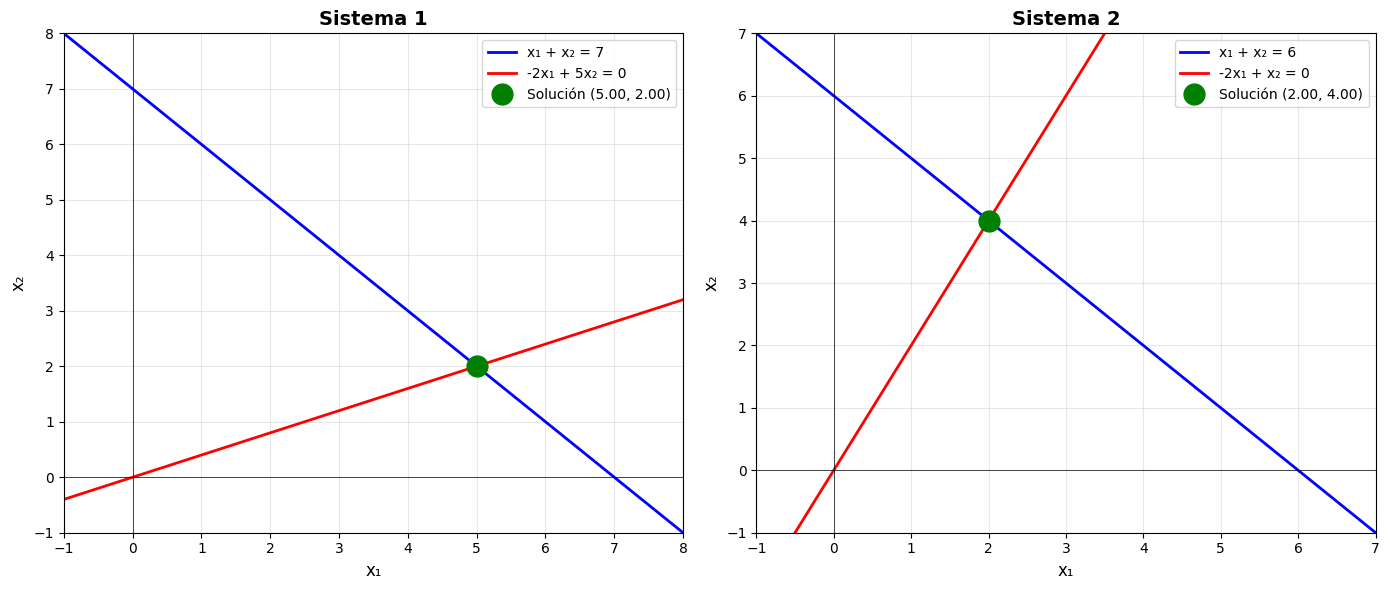

Sistema 1: x₁ = 5.0000, x₂ = 2.0000
Sistema 2: x₁ = 2.0000, x₂ = 4.0000


In [10]:
# Gráficas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Sistema 1
ax1 = axes[0]
x_vals = np.linspace(-2, 10, 400)
y1_s1 = 7 - x_vals  # x1 + x2 = 7
y2_s1 = 0.4 * x_vals  # -2x1 + 5x2 = 0  =>  x2 = 0.4*x1

ax1.plot(x_vals, y1_s1, 'b-', linewidth=2, label='x₁ + x₂ = 7')
ax1.plot(x_vals, y2_s1, 'r-', linewidth=2, label='-2x₁ + 5x₂ = 0')
ax1.plot(sol1_gauss[0], sol1_gauss[1], 'go', markersize=15, 
         label=f'Solución ({sol1_gauss[0]:.2f}, {sol1_gauss[1]:.2f})', zorder=5)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x₁', fontsize=12)
ax1.set_ylabel('x₂', fontsize=12)
ax1.set_title('Sistema 1', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.set_xlim(-1, 8)
ax1.set_ylim(-1, 8)

# Sistema 2
ax2 = axes[1]
y1_s2 = 6 - x_vals  # x1 + x2 = 6
y2_s2 = 2 * x_vals  # -2x1 + x2 = 0  =>  x2 = 2*x1

ax2.plot(x_vals, y1_s2, 'b-', linewidth=2, label='x₁ + x₂ = 6')
ax2.plot(x_vals, y2_s2, 'r-', linewidth=2, label='-2x₁ + x₂ = 0')
ax2.plot(sol2_gauss[0], sol2_gauss[1], 'go', markersize=15, 
         label=f'Solución ({sol2_gauss[0]:.2f}, {sol2_gauss[1]:.2f})', zorder=5)
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x₁', fontsize=12)
ax2.set_ylabel('x₂', fontsize=12)
ax2.set_title('Sistema 2', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.set_xlim(-1, 7)
ax2.set_ylim(-1, 7)

plt.tight_layout()
plt.show()

print(f"Sistema 1: x₁ = {sol1_gauss[0]:.4f}, x₂ = {sol1_gauss[1]:.4f}")
print(f"Sistema 2: x₁ = {sol2_gauss[0]:.4f}, x₂ = {sol2_gauss[1]:.4f}")